In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
#Section 3.d.1
def eggHolder(x,y):
    return -(y + 47)*np.sin(np.sqrt(np.abs(x/2 + (y + 47)))) - x * np.sin(np.sqrt(np.abs(x - (y+47))))

NameError: name 'eggHolder' is not defined

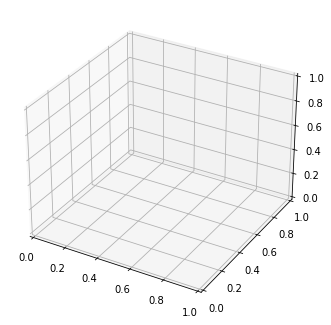

In [2]:
#Section 3.d.2
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1,projection='3d')
xvalues = np.linspace(-512,512,500)
yvalues = np.linspace(-512,512,500)
xgrid, ygrid = np.meshgrid(xvalues, yvalues)
zvalues = eggHolder(xgrid,ygrid)

surf = ax.plot_surface(xgrid, ygrid, zvalues, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)
fig.colorbar(surf, aspect=18)
plt.tight_layout()
plt.show()

In [ ]:
#Section 3.d.3
def simulatedAnnealing(initialT, alpha, nIter, finalT):
    temp = initialT
    #generate initial solution
    #Section 3.d.4
    currentSolution = np.random.randn(1,2) * 256
    bestSolution = currentSolution

    solutions = currentSolution
    temperatures = np.array([])
    temperatures = np.append(temperatures, initialT)

    while temp >= finalT:
        for i in range(nIter):
            while True:
                #Section 3.d.4
                neighbourSolution = currentSolution + np.random.randn()*10
                if neighbourSolution[0][0] >= -512 and neighbourSolution[0][0] <= 512:
                    if neighbourSolution[0][1] >= -512 and neighbourSolution[0][1] <= 512:
                        #Section 3.d.5
                        break

            delta = eggHolder(neighbourSolution[0][0], neighbourSolution[0][1]) - eggHolder(currentSolution[0][0], currentSolution[0][1])
            metropolis = np.exp(-delta / temp)
            if np.random.rand() < metropolis or delta < 0:
                currentSolution = neighbourSolution
                if eggHolder(currentSolution[0][0], currentSolution[0][1]) < eggHolder(bestSolution[0][0], bestSolution[0][1]):
                    bestSolution = currentSolution

        temp = alpha * temp

        solutions = np.append(solutions, currentSolution, axis=0)
        temperatures = np.append(temperatures, temp)

    return bestSolution, solutions, temperatures